# Importando Pacotes e Dados

In [1]:
library(readxl)
library(tidyverse)
library(arrow)
library(rsample)
options(dplyr.width = Inf, dplyr.print_min = Inf)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
data <- read_excel("../Dados/Bruto/FEV-data-Excel.xlsx")

head(data)
str(data)

Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],⋯,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95,438,⋯,3130,640,5,5,19,200,660,5.7,150,24.45
Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71,340,⋯,3040,670,5,5,19,190,660,6.8,150,23.80
Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95,364,⋯,3130,565,5,5,20,210,660,4.5,150,27.55
Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71,346,⋯,3040,640,5,5,19,190,615,6.8,150,23.30
Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95,447,⋯,3130,670,5,5,19,200,615,5.7,150,23.85
Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95,369,⋯,3130,565,5,5,20,210,615,4.5,150,27.20


tibble [53 × 25] (S3: tbl_df/tbl/data.frame)
 $ Car full name                         : chr [1:53] "Audi e-tron 55 quattro" "Audi e-tron 50 quattro" "Audi e-tron S quattro" "Audi e-tron Sportback 50 quattro" ...
 $ Make                                  : chr [1:53] "Audi" "Audi" "Audi" "Audi" ...
 $ Model                                 : chr [1:53] "e-tron 55 quattro" "e-tron 50 quattro" "e-tron S quattro" "e-tron Sportback 50 quattro" ...
 $ Minimal price (gross) [PLN]           : num [1:53] 345700 308400 414900 319700 357000 ...
 $ Engine power [KM]                     : num [1:53] 360 313 503 313 360 503 170 184 286 136 ...
 $ Maximum torque [Nm]                   : num [1:53] 664 540 973 540 664 973 250 270 400 260 ...
 $ Type of brakes                        : chr [1:53] "disc (front + rear)" "disc (front + rear)" "disc (front + rear)" "disc (front + rear)" ...
 $ Drive type                            : chr [1:53] "4WD" "4WD" "4WD" "4WD" ...
 $ Battery capacity [kWh]             

In [3]:
data <- data %>%
    mutate_if(is.character, as.factor) %>%
    rename(
        'Carro' = 'Car full name',
        'Marca' = 'Make',
        'Modelo' = 'Model',
        'PrecoMax' = 'Minimal price (gross) [PLN]',
        'PotenciaMotor' = 'Engine power [KM]',
        'TorqueMax' = 'Maximum torque [Nm]',
        'Freios' = 'Type of brakes',
        'Tracao' = 'Drive type',
        'CapacidadeBateria' = 'Battery capacity [kWh]',
        'Autonomia' = 'Range (WLTP) [km]',
        'Entre-eixos' = 'Wheelbase [cm]',
        'Comprimento' = 'Length [cm]',
        'Largura' = 'Width [cm]',
        'Altura' = 'Height [cm]',
        'PesoMin' = 'Minimal empty weight [kg]',
        'PesoMax' = 'Permissable gross weight [kg]',
        'CargaMax' = 'Maximum load capacity [kg]',
        'NumAssentos' = 'Number of seats',
        'NumPorta' = 'Number of doors',
        'TamanhoPneus' = 'Tire size [in]',
        'VeloMax' = 'Maximum speed [kph]',
        'TamanhoPorta-Malas' = 'Boot capacity (VDA) [l]',
        'Aceleracao' = 'Acceleration 0-100 kph [s]',
        'PotenciaMaximaBat' = 'Maximum DC charging power [kW]',
        'ConsumoMedio' = 'mean - Energy consumption [kWh/100 km]'

    )

head(data)

Carro,Marca,Modelo,PrecoMax,PotenciaMotor,TorqueMax,Freios,Tracao,CapacidadeBateria,Autonomia,⋯,PesoMax,CargaMax,NumAssentos,NumPorta,TamanhoPneus,VeloMax,TamanhoPorta-Malas,Aceleracao,PotenciaMaximaBat,ConsumoMedio
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95,438,⋯,3130,640,5,5,19,200,660,5.7,150,24.45
Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71,340,⋯,3040,670,5,5,19,190,660,6.8,150,23.80
Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95,364,⋯,3130,565,5,5,20,210,660,4.5,150,27.55
Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71,346,⋯,3040,640,5,5,19,190,615,6.8,150,23.30
Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95,447,⋯,3130,670,5,5,19,200,615,5.7,150,23.85
Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95,369,⋯,3130,565,5,5,20,210,615,4.5,150,27.20


## Verificando se há valores faltantes

In [4]:
qnt_na <- function(df) {
    df %>%
        summarise_all(funs(sum(is.na(.)))) %>%
        pivot_longer(cols = everything(), names_to = 'Colunas', values_to = 'QntNA') %>%
        filter(QntNA > 0) %>%
        arrange(desc(QntNA))
}

qnt_na(data)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


Colunas,QntNA
<chr>,<int>
ConsumoMedio,9
PesoMax,8
CargaMax,8
Aceleracao,3
Freios,1
TamanhoPorta-Malas,1


O meu objetivo com esse trabalho é tentar prever o consumo médio de energia de um carro elétrico, então vou remover as linhas que possuem valores faltantes na coluna 'Consumo Médio [kWh/100 km]' e verificar se acabo por resolver o problema de valores nulos de outras colunas

In [5]:
qnt_na(
    data %>%
        filter(!(is.na(`ConsumoMedio`)))
)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


Colunas,QntNA
<chr>,<int>
Aceleracao,2
Freios,1
TamanhoPorta-Malas,1


In [6]:
data <- data %>%
    filter(!(is.na(`ConsumoMedio`)))

Ao remover os valores NA da coluna target (Consumo Médio [kWh/100 km]) conseguimos reduzir um pouco os valores NA das outras colunas, mas ainda temos muitos valores NA. Vamos verificar o caso desses.

In [7]:
data %>%
    filter_all(any_vars(is.na(.)))

Carro,Marca,Modelo,PrecoMax,PotenciaMotor,TorqueMax,Freios,Tracao,CapacidadeBateria,Autonomia,⋯,PesoMax,CargaMax,NumAssentos,NumPorta,TamanhoPneus,VeloMax,TamanhoPorta-Malas,Aceleracao,PotenciaMaximaBat,ConsumoMedio
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,204,362,NA,2WD (front),90,356,⋯,3500,865,6,5,17,160,NA,NA,110,28.2
Nissan e-NV200 evalia,Nissan,e-NV200 evalia,164328,109,254,disc (front + rear),2WD (front),40,200,⋯,2250,658,5,5,15,123,870,NA,50,25.9


## Aceleração 0-100 kph [s]

Para realizar a imputação na variável Aceleração 0-100 kph [s], foi utilizado o método de regressão linear para tentar aferir alguma relação entre as variáves que possuem valores faltantes e as que não possuem. A Regressão concluiu que existe um relação estatística entre a Potencia do Motor [kW] e a Aceleração 0-100 kph [s]. Vamos, portanto, criar um modelo de regressão linear para prever os valores faltantes da variável Aceleração 0-100 kph [s].

In [8]:

summary(lm(
    `Aceleracao` ~ `PotenciaMotor`
                                + `TorqueMax`
                                + `CapacidadeBateria`
                                + `Autonomia`
                                + `PesoMin`
                                + `PesoMax`
                                + `VeloMax`,
    data = data
))


Call:
lm(formula = Aceleracao ~ PotenciaMotor + TorqueMax + CapacidadeBateria + 
    Autonomia + PesoMin + PesoMax + VeloMax, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92304 -0.55192 -0.01871  0.71132  1.75397 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       15.599528   2.382014   6.549 1.68e-07 ***
PotenciaMotor     -0.013296   0.006352  -2.093   0.0439 *  
TorqueMax          0.001144   0.002896   0.395   0.6953    
CapacidadeBateria  0.053542   0.044554   1.202   0.2378    
Autonomia         -0.009414   0.005168  -1.822   0.0773 .  
PesoMin           -0.004513   0.002586  -1.745   0.0900 .  
PesoMax            0.002862   0.001780   1.608   0.1171    
VeloMax           -0.018555   0.016690  -1.112   0.2740    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 34 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8604,	Ad

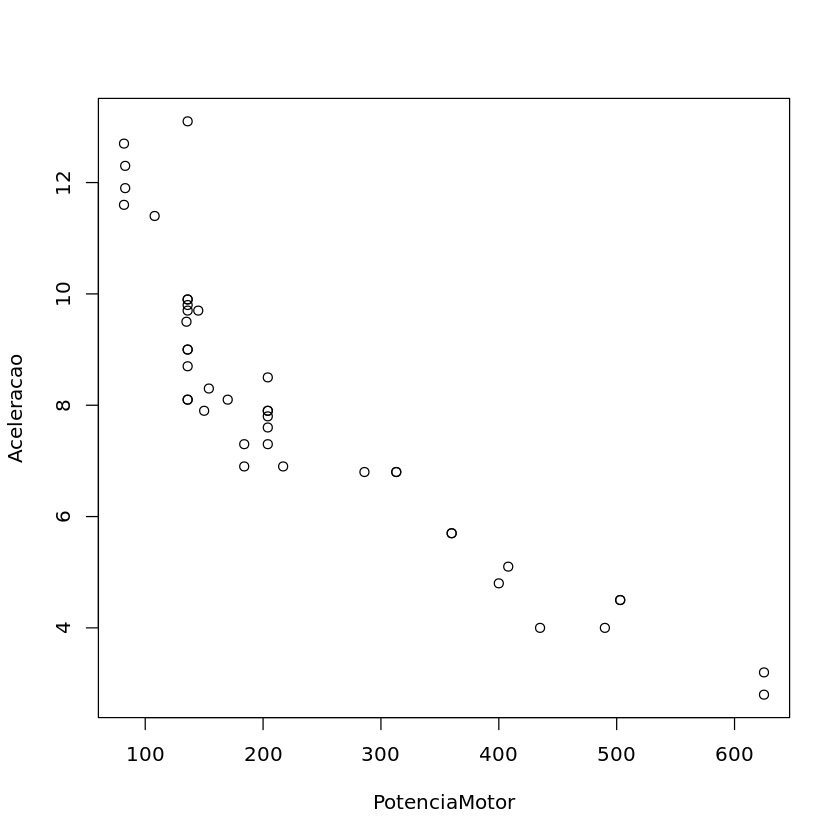

In [9]:
plot(
    `Aceleracao` ~ `PotenciaMotor`,
    data = data
)

In [10]:
separate_data <- function(df, props) {
    df_split <- initial_split(df, prop = props)

    df_train <- training(df_split)
    df_test <- testing(df_split)

    return(list(df_train, df_test))
}

r2 <- function(test_data, pred_data) {
    1 - (sum((test_data - pred_data)^2) / sum((test_data - mean(test_data))^2))
}

train_model <- function(data, col_target) {
    model_data <- separate_data(data, 0.8)
    modelo <- lm(`Aceleracao` ~ `PotenciaMotor`, data = model_data[[1]])
    pred <- predict(modelo, model_data[[2]])
    R2 <- r2(model_data[[2]]$`Aceleracao`, pred)

    return(list(modelo, R2))
}


model <- train_model(
    data %>% na.omit()
)

print(model[[2]])

[1] 0.7922875


In [11]:
data <- data %>%
    mutate(
        'Aceleracao' = ifelse(
            is.na(`Aceleracao`),
            predict(model[[1]], data %>% filter(is.na(`Aceleracao`))),
            `Aceleracao`
        )
    )

data %>%
    head()

Carro,Marca,Modelo,PrecoMax,PotenciaMotor,TorqueMax,Freios,Tracao,CapacidadeBateria,Autonomia,⋯,PesoMax,CargaMax,NumAssentos,NumPorta,TamanhoPneus,VeloMax,TamanhoPorta-Malas,Aceleracao,PotenciaMaximaBat,ConsumoMedio
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95,438,⋯,3130,640,5,5,19,200,660,5.7,150,24.45
Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71,340,⋯,3040,670,5,5,19,190,660,6.8,150,23.80
Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95,364,⋯,3130,565,5,5,20,210,660,4.5,150,27.55
Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71,346,⋯,3040,640,5,5,19,190,615,6.8,150,23.30
Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95,447,⋯,3130,670,5,5,19,200,615,5.7,150,23.85
Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95,369,⋯,3130,565,5,5,20,210,615,4.5,150,27.20


## Capacidade Porta Malas

In [12]:
data %>%
    filter_all(any_vars(is.na(.)))

Carro,Marca,Modelo,PrecoMax,PotenciaMotor,TorqueMax,Freios,Tracao,CapacidadeBateria,Autonomia,⋯,PesoMax,CargaMax,NumAssentos,NumPorta,TamanhoPneus,VeloMax,TamanhoPorta-Malas,Aceleracao,PotenciaMaximaBat,ConsumoMedio
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,204,362,NA,2WD (front),90,356,⋯,3500,865,6,5,17,160,NA,8.503507,110,28.2


In [13]:
summary(lm(
    `TamanhoPorta-Malas` ~ `PesoMin`
                        + `PesoMax`
                        + `Entre-eixos`
                                          ,
    data = data
))


Call:
lm(formula = `TamanhoPorta-Malas` ~ PesoMin + PesoMax + `Entre-eixos`, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-130.67  -42.83   -9.21   40.87  402.99 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -406.0595   249.7509  -1.626  0.11203   
PesoMin         -0.2480     0.1486  -1.669  0.10320   
PesoMax          0.4060     0.1465   2.772  0.00851 **
`Entre-eixos`    1.3004     1.3070   0.995  0.32588   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.35 on 39 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6955,	Adjusted R-squared:  0.6721 
F-statistic: 29.69 on 3 and 39 DF,  p-value: 3.647e-10


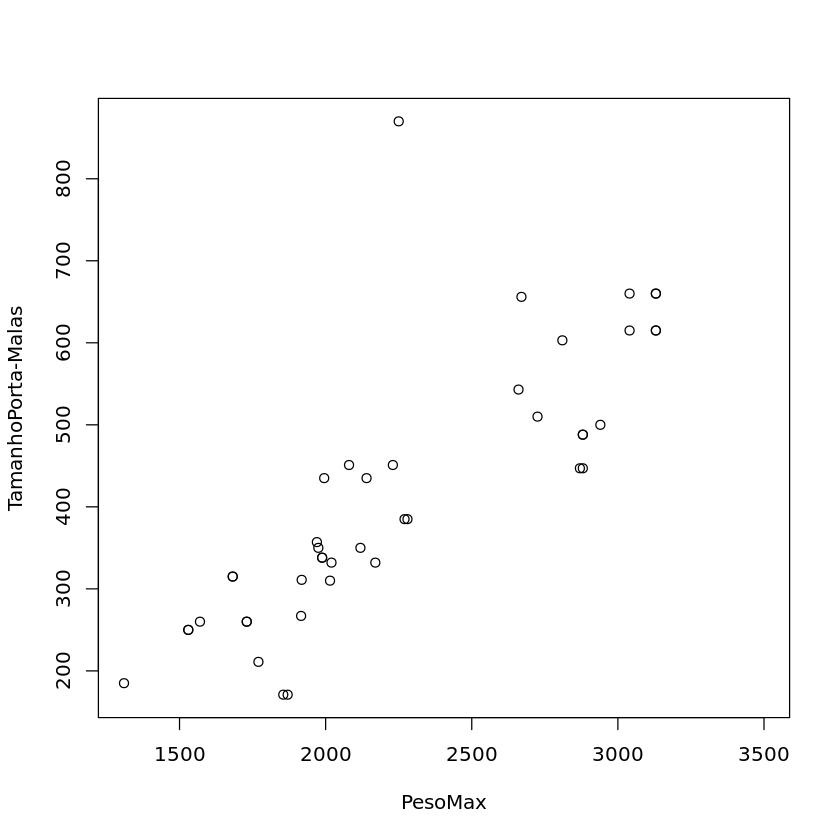

In [14]:
plot(
    `TamanhoPorta-Malas` ~ `PesoMax`,
    data = data
)

In [15]:
train_model_2 <- function(data) {
    model_data <- separate_data(data, 0.8)
    modelo <- lm(`TamanhoPorta-Malas` ~ `PesoMax`, data = model_data[[1]])
    pred <- predict(modelo, model_data[[2]])
    R2 <- r2(model_data[[2]]$`TamanhoPorta-Malas`, pred)

    return(list(modelo, R2))
}

model_2 <- train_model_2(
    data %>% na.omit()
)

model_2

[[1]]

Call:
lm(formula = `TamanhoPorta-Malas` ~ PesoMax, data = model_data[[1]])

Coefficients:
(Intercept)      PesoMax  
   -165.760        0.261  


[[2]]
[1] 0.6456655


In [16]:
data <- data %>%
    mutate(
        `TamanhoPorta-Malas` = ifelse(
            is.na(`TamanhoPorta-Malas`),
            predict(model_2[[1]], data %>% filter(is.na(`TamanhoPorta-Malas`))),
            `TamanhoPorta-Malas`
        )
    )

## Tipo de Freios

A maior parte dos freios é do tipo "disc (front + rear)" vou preencher o NA com esse valor.

In [17]:
data %>%
    select('Freios') %>%
    table() %>%
    prop.table() * 100

Freios
       disc (front + rear) disc (front) + drum (rear) 
                  83.72093                   16.27907 

In [18]:
data <- data %>%
    replace_na(list(
        'Freios' = 'disc (front + rear)'
    ))

data %>%
    head()

Carro,Marca,Modelo,PrecoMax,PotenciaMotor,TorqueMax,Freios,Tracao,CapacidadeBateria,Autonomia,⋯,PesoMax,CargaMax,NumAssentos,NumPorta,TamanhoPneus,VeloMax,TamanhoPorta-Malas,Aceleracao,PotenciaMaximaBat,ConsumoMedio
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95,438,⋯,3130,640,5,5,19,200,660,5.7,150,24.45
Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71,340,⋯,3040,670,5,5,19,190,660,6.8,150,23.80
Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95,364,⋯,3130,565,5,5,20,210,660,4.5,150,27.55
Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71,346,⋯,3040,640,5,5,19,190,615,6.8,150,23.30
Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95,447,⋯,3130,670,5,5,19,200,615,5.7,150,23.85
Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95,369,⋯,3130,565,5,5,20,210,615,4.5,150,27.20


In [19]:
data %>%
    qnt_na()

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


Colunas,QntNA
<chr>,<int>


# Exportação dos dados modificados

In [20]:
write_parquet(data, '../Dados/Processado/Carros.parquet')

In [21]:
read_parquet('../Dados/Processado/Carros.parquet') %>%
    head() %>%
    str()

tibble [6 × 25] (S3: tbl_df/tbl/data.frame)
 $ Carro             : Factor w/ 53 levels "Audi e-tron 50 quattro",..: 2 1 3 4 5 6
 $ Marca             : Factor w/ 20 levels "Audi","BMW","Citroën",..: 1 1 1 1 1 1
 $ Modelo            : Factor w/ 53 levels "Citigo-e iV",..: 17 16 18 19 20 21
 $ PrecoMax          : num [1:6] 345700 308400 414900 319700 357000 ...
 $ PotenciaMotor     : num [1:6] 360 313 503 313 360 503
 $ TorqueMax         : num [1:6] 664 540 973 540 664 973
 $ Freios            : Factor w/ 2 levels "disc (front + rear)",..: 1 1 1 1 1 1
 $ Tracao            : Factor w/ 3 levels "2WD (front)",..: 3 3 3 3 3 3
 $ CapacidadeBateria : num [1:6] 95 71 95 71 95 95
 $ Autonomia         : num [1:6] 438 340 364 346 447 369
 $ Entre-eixos       : num [1:6] 293 293 293 293 293 ...
 $ Comprimento       : num [1:6] 490 490 490 490 490 ...
 $ Largura           : num [1:6] 194 194 198 194 194 ...
 $ Altura            : num [1:6] 163 163 163 162 162 ...
 $ PesoMin           : num [1:6] 2565